In [1]:
# https://insights.stackoverflow.com/survey

In [2]:
# for printing bold 
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
survey_raw_df  = pd.read_csv('survey_results_public.csv')

survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
survey_raw_df.shape

(64461, 61)

In [6]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
schema_raw = pd.read_csv('survey_results_schema.csv',index_col='Column')['QuestionText']

In [8]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

### Filtering the columns :

In [9]:
selected_cols = [
    # Demographic
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    
    # Prgmming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [10]:
len(selected_cols)

20

In [11]:
# filtering
survey_df = survey_raw_df[selected_cols].copy()

In [12]:
schema = schema_raw[selected_cols]

In [13]:
survey_df.shape

(64461, 20)

In [14]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [15]:
# convert all strings that should be numerical :
survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'], errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'], errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'], errors='coerce')

In [16]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [17]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12469
India                  8403
United Kingdom         3896
Germany                3890
Canada                 2191
France                 1898
Brazil                 1818
Netherlands            1343
Poland                 1278
Australia              1208
Spain                  1161
Italy                  1117
Russian Federation     1092
Sweden                  886
Pakistan                809
Name: Country, dtype: int64

In [18]:
#  drop all the rows, where the age is nelow 10 and above 100 and also hors worked are above 140, cause they are impossible.
age_less_10 = survey_df[survey_df['Age'] < 10].index
age_more_100 = survey_df[survey_df['Age'] > 100].index
workWeek_more_140 = survey_df[survey_df['WorkWeekHrs'] > 140].index

In [19]:
survey_df = survey_df.drop(age_less_10)
survey_df = survey_df.drop(age_more_100)
survey_df = survey_df.drop(workWeek_more_140)

In [20]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45319.000000,57326.000000,56636.000000,43993.000000,41002.000000
mean,30.832322,15.475317,12.783883,8.873003,40.024395
std,9.505965,5.114952,9.494519,7.762089,10.630010
min,10.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,43.000000
max,99.000000,85.000000,50.000000,50.000000,140.000000


In [21]:
#  we have too many different genders, need to filter : 
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [22]:
# replace all rows that contains ; with nan
condition = survey_df['Gender'].str.contains(';', na=False)

print(f'ther are {condition.sum()} rows with ; present')
condition.value_counts()

ther are 311 rows with ; present


False    63995
True       311
Name: Gender, dtype: int64

In [23]:
# replace that column with nan
survey_df.loc[condition,:] = np.nan

In [24]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [25]:
#  same method using .where
# survey_df.where(  ~(condition), np.nan, inplace=True )

# Replace values where the condition is False. make sure to negate.

s = pd.Series(range(5))
s.where(~(s > 2))

0    0.0
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [26]:
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
41096,India,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
47717,Israel,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Bash/Shell/PowerShell;Java;JavaScript,C#;Java;JavaScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
44872,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C++,Assembly;Bash/Shell/PowerShell;Python;Ruby,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Critically important
156,United States,40.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,22.0,18.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;P...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",35.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Very important
53314,United States,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,14.0,3.0,C;C#;C++;Python,C#;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",43.0,Slightly satisfied,Industry that I’d be working in;Specific depar...,Often: 1-2 days per week or more,Somewhat important


## Population :

In [27]:
schema.Country

'Where do you live?'

In [28]:
survey_df['Country'].nunique()

183

In [29]:
top_countries = survey_df['Country'].value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

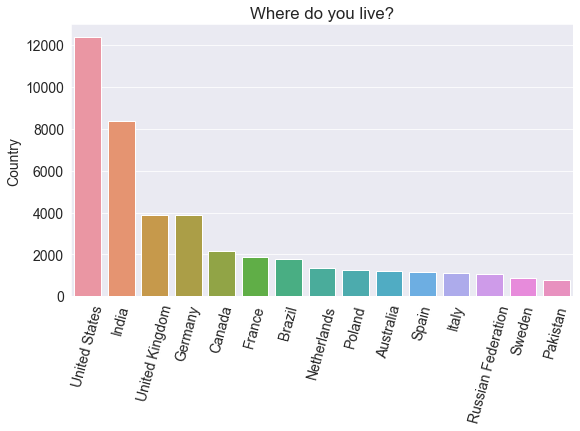

In [30]:
sns.barplot(x = top_countries.index, y = top_countries)
plt.title(schema['Country'])
plt.xticks(rotation=75)
plt.show()

## Age :

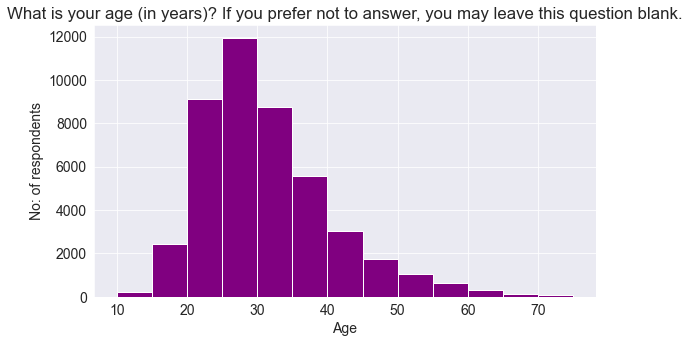

In [31]:
plt.hist(survey_df['Age'], bins=np.arange(10,80,5), color='purple')
plt.title(schema['Age'])
plt.xlabel('Age')
plt.ylabel('No: of respondents')

plt.show()

## Gender :

In [32]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [33]:
gender_counts = survey_df['Gender'].value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

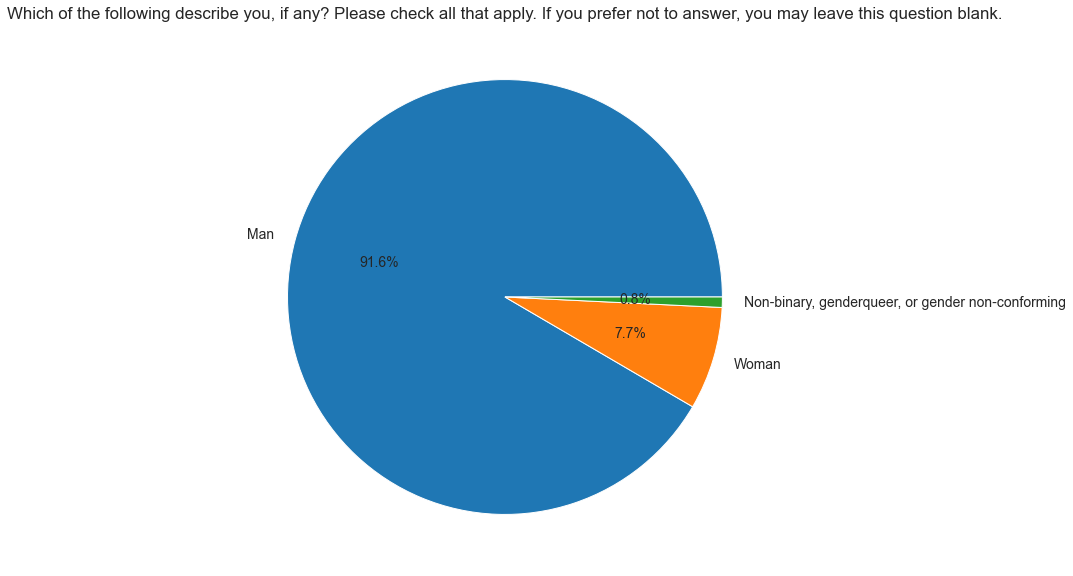

In [34]:
plt.figure(figsize=(15,10))
plt.title(schema['Gender'])
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.show()

## Educational Level :

In [35]:
schema['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed?'

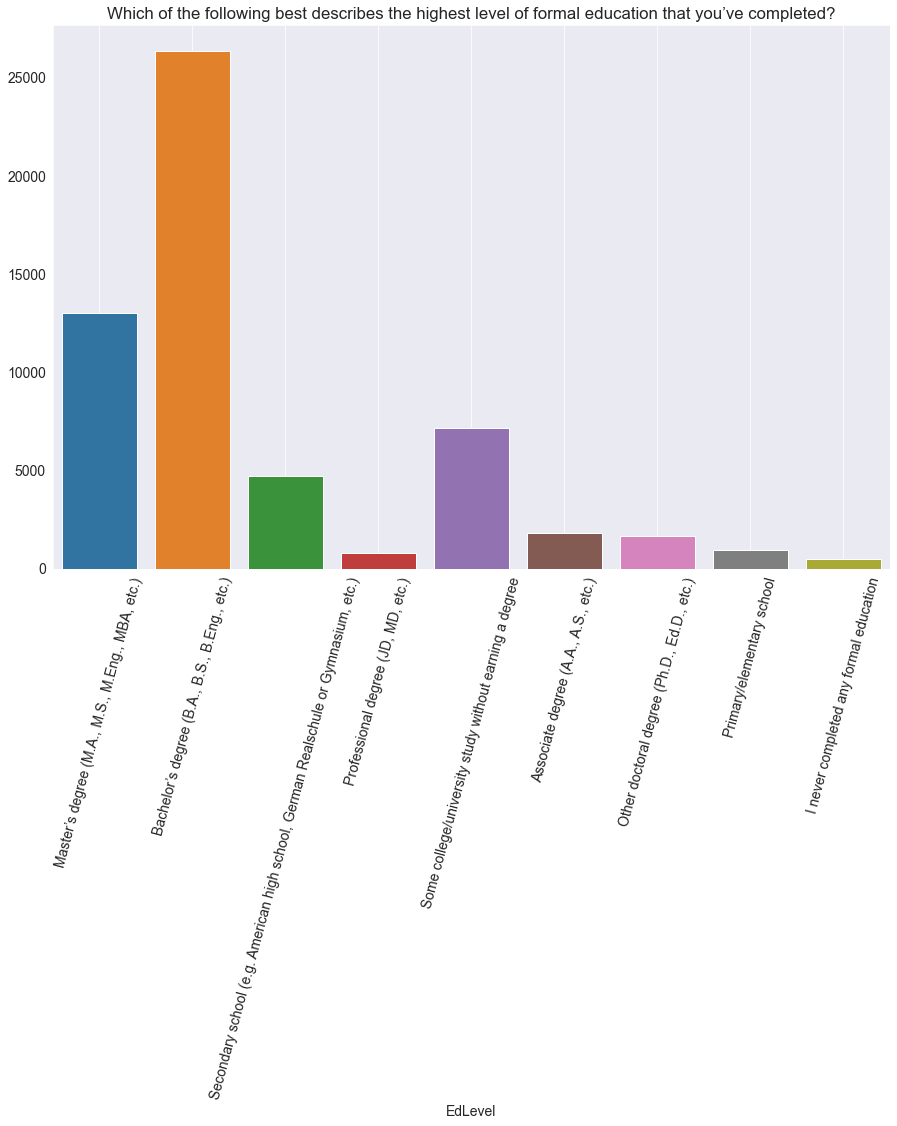

In [36]:
plt.figure(figsize=(15,10))

sns.countplot(x = survey_df['EdLevel'])

plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

plt.grid()

plt.show()

In [37]:
# percentage plot for clarity :
df_ = survey_df['EdLevel'].value_counts(normalize=True).to_frame()
df_['EdLevel'] = df_['EdLevel'] * 100
df_

,EdLevel
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",46.254014
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.856742
Some college/university study without earning a degree,12.570857
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",8.290483
"Associate degree (A.A., A.S., etc.)",3.213352
"Other doctoral degree (Ph.D., Ed.D., etc.)",2.950106
Primary/elementary school,1.630368
"Professional degree (JD, MD, etc.)",1.391692
I never completed any formal education,0.842386


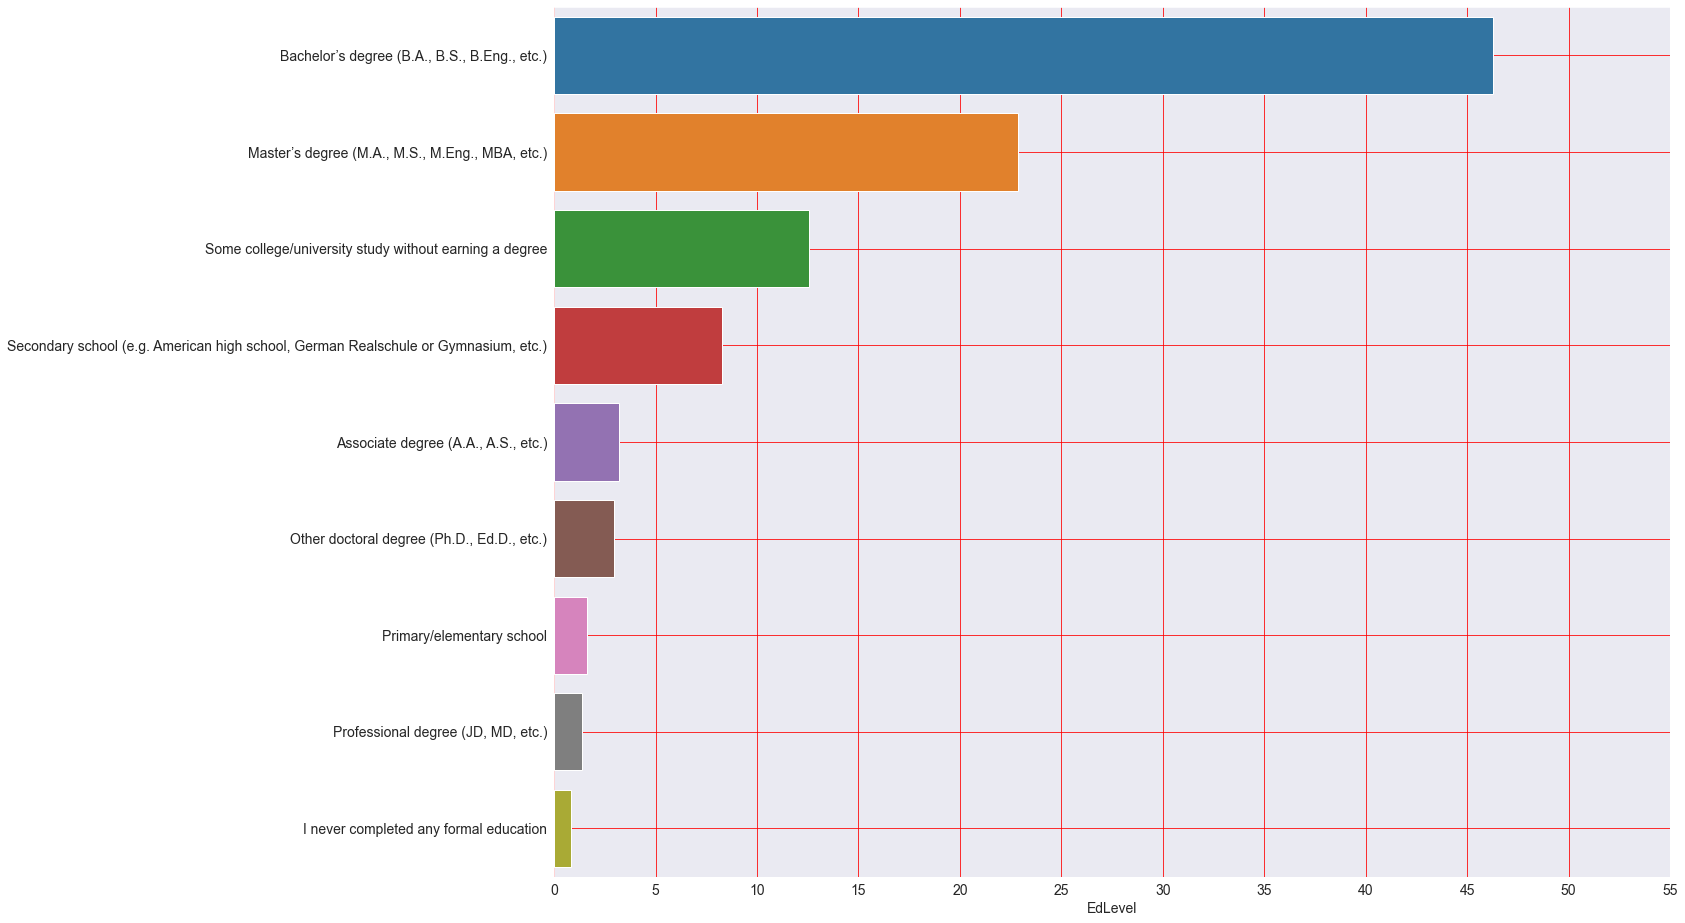

In [38]:
plt.figure(figsize=(20,16))


sns.barplot(x = df_['EdLevel'],y = df_.index )

plt.xticks(np.arange(0,60,5))

plt.grid(color='r')

plt.show()

In [39]:
schema['UndergradMajor']

'What was your primary field of study?'

In [40]:
df_ = (survey_df['UndergradMajor'].value_counts(normalize=True)*100).to_frame()
df_

,UndergradMajor
"Computer science, computer engineering, or software engineering",61.939193
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.354195
"Information systems, information technology, or system administration",7.983168
"A natural science (such as biology, chemistry, physics, etc.)",4.316561
Mathematics or statistics,3.627097
Web development or web design,3.502637
"A business discipline (such as accounting, finance, marketing, etc.)",2.700567
"A humanities discipline (such as literature, history, philosophy, etc.)",1.969616
"A social science (such as anthropology, psychology, political science, etc.)",1.821450
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",1.412513


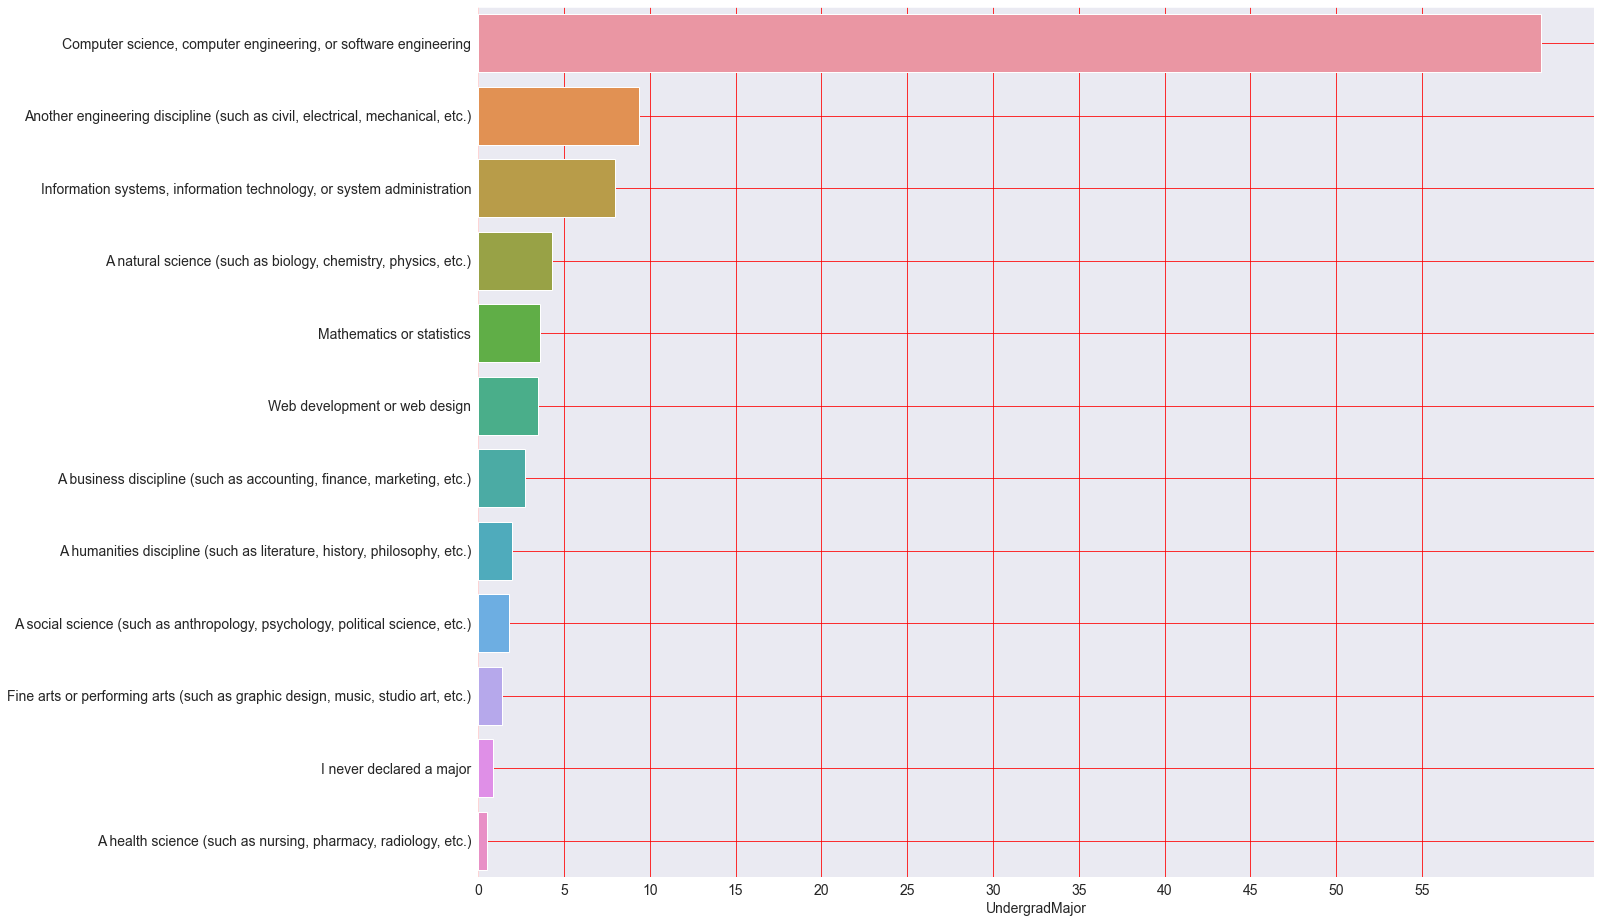

In [41]:
# undergrad data : (percentage)

plt.figure(figsize=(20,16))


sns.barplot(x = df_['UndergradMajor'],y = df_.index )

plt.xticks(np.arange(0,60,5))

plt.grid(color='r')

plt.show()

In [42]:
schema['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

In [43]:
c = survey_df['NEWEdImpt'].value_counts()
c

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

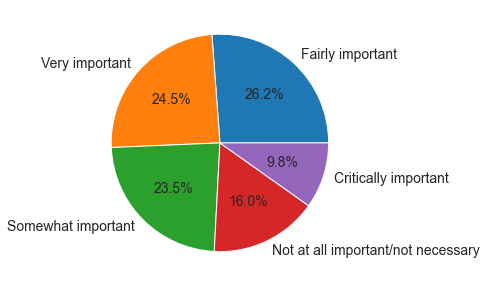

In [44]:
plt.pie(c,labels=c.index, autopct='%1.1f%%')
    
plt.show()

In [45]:
schema['Employment']

'Which of the following best describes your current employment status?'

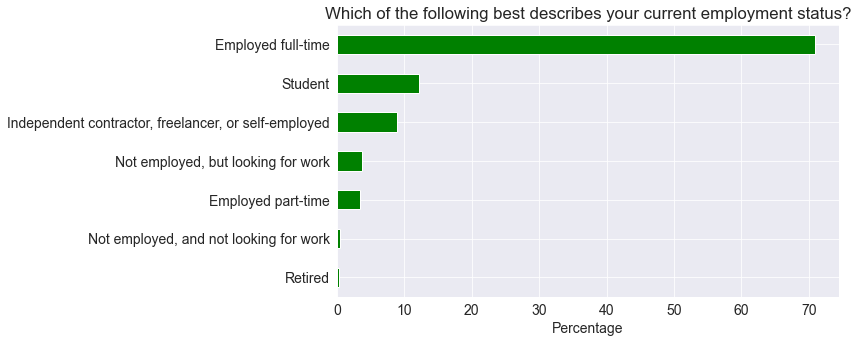

In [46]:
(survey_df['Employment'].value_counts(normalize=True, ascending=True)*100).plot(kind='barh',color='g')

plt.title(schema['Employment'])
plt.xlabel('Percentage')

plt.show()

### Map the different employments into different groups :

In [47]:
survey_df['Employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [48]:
# add a new column EmploymentType :
# Enthusiast : Student, Not employed, but looking for work
# Professional :Independent contractor, freelancer, Employed full-time, Employed part-time
# Other :Retired, Not employed, and not looking for work

mapping = {'Student':'Enthusiast','Not employed, but looking for work':'Enthusiast',
          'Independent contractor, freelancer, or self-employed':'Professional','Employed full-time':'Professional','Employed part-time':'Professional',
          'Retired':'other','Not employed, and not looking for work':'other'}

survey_df['Employment'].map(mapping)


0        Professional
1        Professional
2                 NaN
3                 NaN
4        Professional
             ...     
64456    Professional
64457    Professional
64458             NaN
64459    Professional
64460    Professional
Name: Employment, Length: 64306, dtype: object

In [49]:
survey_df['EmploymentType'] = survey_df['Employment'].map(mapping)

In [50]:
survey_df.sample(3)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,EmploymentType
16953,India,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,7.0,3.0,C;C++;Java;Kotlin;Objective-C;Python;Swift,...,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, mobile;Educator",50.0,Slightly satisfied,Specific department or team I’d be working on;...,Sometimes: 1-2 days per month but less than we...,Very important,Professional
3954,United States,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,16.0,8.0,4.0,HTML/CSS;Java;JavaScript;Kotlin;PHP;Python;SQL...,...,Once a year,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Engineer, site reliability;Engineering manager...",5.0,Very satisfied,How widely used or impactful my work output wo...,Often: 1-2 days per week or more,Very important,Professional
5487,United States,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,7.0,NaN,Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScri...,...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack",35.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Very important,Professional


### Analyze the different type of Developers :

In [51]:
schema['DevType']

'Which of the following describe you? Please select all that apply.'

In [52]:
(survey_df['DevType'].value_counts()).to_frame()

,DevType
"Developer, full-stack",4396
"Developer, back-end",3056
"Developer, back-end;Developer, front-end;Developer, full-stack",2214
"Developer, back-end;Developer, full-stack",1465
"Developer, front-end",1390
...,...
"Developer, full-stack;Scientist;Senior executive/VP",1
"Developer, back-end;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Engineer, site reliability;System administrator",1
"Designer;Developer, back-end;Developer, embedded applications or devices;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Engineer, data",1
"Data scientist or machine learning specialist;Developer, back-end;Developer, full-stack;Developer, game or graphics;Developer, mobile;Scientist",1


##### Split the DevType column :

In [53]:
splited_df = (survey_df['DevType'].str.split(";", n = -1)).to_frame().rename(columns={'DevType':'splited_DevType'})
splited_df.head()

,splited_DevType
0,"[Developer, desktop or enterprise applications..."
1,"[Developer, full-stack, Developer, mobile]"
2,NaN
3,NaN
4,NaN


In [54]:
# to make sure the splitting is done properly :
splited_df.loc[0,'splited_DevType']

['Developer, desktop or enterprise applications', 'Developer, full-stack']

In [55]:
#  to find all the unique developers present :
main_list = []
for vals in splited_df['splited_DevType'].dropna():
        for val in vals:
            if val not in main_list:
                main_list.append(val)
main_list = set(main_list)
dev_list = list(main_list)
dev_list

['Engineering manager',
 'Academic researcher',
 'Engineer, data',
 'Developer, back-end',
 'Designer',
 'Database administrator',
 'Marketing or sales professional',
 'Scientist',
 'Senior executive/VP',
 'Educator',
 'Developer, embedded applications or devices',
 'Product manager',
 'Engineer, site reliability',
 'Developer, full-stack',
 'Developer, desktop or enterprise applications',
 'Data scientist or machine learning specialist',
 'Data or business analyst',
 'Developer, front-end',
 'Developer, mobile',
 'Developer, game or graphics',
 'System administrator',
 'DevOps specialist',
 'Developer, QA or test']

In [56]:
# find the count of unique devs :
from collections import Counter

m_list = []

for vals in splited_df['splited_DevType']:
    try:
        for i in vals:
            m_list.append(i)
    except:
        pass
        
c = Counter(m_list)
    
count = dict(c)
count


{'Developer, desktop or enterprise applications': 11687,
 'Developer, full-stack': 26915,
 'Developer, mobile': 9406,
 'Designer': 5262,
 'Developer, front-end': 18128,
 'Developer, back-end': 26996,
 'Developer, QA or test': 3893,
 'DevOps specialist': 5915,
 'Developer, game or graphics': 2751,
 'Database administrator': 5658,
 'Developer, embedded applications or devices': 4701,
 'Engineer, data': 3700,
 'Educator': 2895,
 'System administrator': 5185,
 'Engineering manager': 2699,
 'Product manager': 2471,
 'Data or business analyst': 3970,
 'Academic researcher': 3502,
 'Data scientist or machine learning specialist': 3939,
 'Scientist': 2060,
 'Senior executive/VP': 1292,
 'Engineer, site reliability': 1921,
 'Marketing or sales professional': 625}

In [57]:
count_df = pd.DataFrame(data=count.values(),index=count.keys(),columns=['Count'])
count_df = count_df.sort_values('Count')
count_df

,Count
Marketing or sales professional,625
Senior executive/VP,1292
"Engineer, site reliability",1921
Scientist,2060
Product manager,2471
Engineering manager,2699
"Developer, game or graphics",2751
Educator,2895
Academic researcher,3502
"Engineer, data",3700


In [58]:
top_7 = count_df.iloc[-7:,:]

<AxesSubplot:>

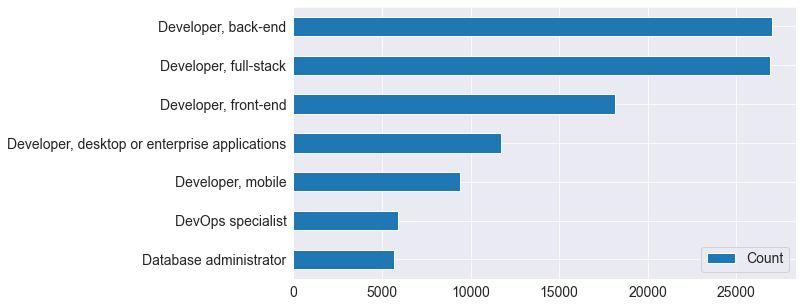

In [59]:
top_7.plot(kind='barh')

### Find the developers percentage based on Gender :

In [60]:
survey_df_ = pd.concat([survey_df,splited_df],axis=1)
survey_df_.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,EmploymentType,splited_DevType
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,36.0,27.0,C#;HTML/CSS;JavaScript,...,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important,Professional,"[Developer, desktop or enterprise applications..."
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19.0,7.0,4.0,JavaScript;Swift,...,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important,Professional,"[Developer, full-stack, Developer, mobile]"


In [61]:
woman = survey_df_.loc[survey_df_['Gender'] == 'Woman',:]
man = survey_df_.loc[survey_df_['Gender'] == 'Man',:]
non_binary = survey_df_.loc[survey_df_['Gender'] == 'Non-binary, genderqueer, or gender non-conforming',:]

woman.head(2)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,...,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt,EmploymentType,splited_DevType
34,United States,16.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,13.0,3.0,NaN,HTML/CSS;Java;JavaScript;Ruby,...,Visit Stack Overflow;Go for a walk or other ph...,"Not employed, but looking for work","Designer;Developer, front-end",NaN,NaN,Flex time or a flexible schedule;Remote work o...,NaN,NaN,Enthusiast,"[Designer, Developer, front-end]"
39,United States,20.0,Woman,"Associate degree (A.A., A.S., etc.)",NaN,Yes,14.0,6.0,NaN,C;C#;C++;HTML/CSS;JavaScript;PHP;Python;SQL,...,NaN,Student,NaN,NaN,NaN,Industry that I’d be working in;Flex time or a...,NaN,NaN,Enthusiast,NaN


### woman count


In [62]:
m_list = []

for vals in woman['splited_DevType'].dropna():
    for i in vals:
        m_list.append(i)
        
c = Counter(m_list)
    
count = dict(c)
count

{'Designer': 333,
 'Developer, front-end': 1196,
 'Developer, full-stack': 1476,
 'Developer, back-end': 1329,
 'Developer, desktop or enterprise applications': 433,
 'Database administrator': 222,
 'System administrator': 137,
 'Developer, mobile': 458,
 'Developer, QA or test': 251,
 'Marketing or sales professional': 64,
 'Developer, game or graphics': 105,
 'Data or business analyst': 282,
 'Data scientist or machine learning specialist': 306,
 'Educator': 178,
 'Engineer, data': 186,
 'Developer, embedded applications or devices': 153,
 'Engineering manager': 97,
 'Product manager': 113,
 'Senior executive/VP': 46,
 'Academic researcher': 213,
 'Scientist': 120,
 'DevOps specialist': 154,
 'Engineer, site reliability': 61}

In [63]:
count_df_woman = pd.DataFrame(data=count.values(),index=count.keys(),columns=['Count'])
count_df_woman = count_df_woman.sort_values('Count')
count_df_woman.head()

,Count
Senior executive/VP,46
"Engineer, site reliability",61
Marketing or sales professional,64
Engineering manager,97
"Developer, game or graphics",105


### man count

In [64]:
m_list = []

for vals in man['splited_DevType'].dropna():
    for i in vals:
        m_list.append(i)
        
c = Counter(m_list)
    
count = dict(c)
count

{'Developer, desktop or enterprise applications': 9803,
 'Developer, full-stack': 22133,
 'Designer': 4134,
 'Developer, front-end': 14606,
 'Developer, mobile': 7650,
 'Developer, back-end': 22325,
 'Developer, game or graphics': 2280,
 'Database administrator': 4737,
 'Developer, embedded applications or devices': 3863,
 'Developer, QA or test': 3143,
 'DevOps specialist': 5102,
 'Engineer, data': 2994,
 'Educator': 2342,
 'System administrator': 4432,
 'Engineering manager': 2258,
 'Product manager': 2053,
 'Data or business analyst': 3083,
 'Academic researcher': 2742,
 'Data scientist or machine learning specialist': 3049,
 'Scientist': 1659,
 'Senior executive/VP': 1047,
 'Engineer, site reliability': 1617,
 'Marketing or sales professional': 456}

In [65]:
count_df_man = pd.DataFrame(data=count.values(),index=count.keys(),columns=['Count'])
count_df_man = count_df_man.sort_values('Count')
count_df_man.head()

,Count
Marketing or sales professional,456
Senior executive/VP,1047
"Engineer, site reliability",1617
Scientist,1659
Product manager,2053


### non_binary count


In [66]:
m_list = []

for vals in non_binary['splited_DevType'].dropna():
    for i in vals:
        m_list.append(i)
        
c = Counter(m_list)
    
count = dict(c)
count

{'Developer, back-end': 160,
 'Developer, full-stack': 162,
 'Database administrator': 37,
 'Designer': 42,
 'Developer, front-end': 108,
 'Engineer, site reliability': 21,
 'System administrator': 48,
 'Developer, desktop or enterprise applications': 62,
 'Developer, mobile': 41,
 'Scientist': 18,
 'Engineer, data': 19,
 'Developer, game or graphics': 33,
 'DevOps specialist': 45,
 'Developer, embedded applications or devices': 27,
 'Data or business analyst': 26,
 'Developer, QA or test': 28,
 'Marketing or sales professional': 7,
 'Data scientist or machine learning specialist': 23,
 'Educator': 22,
 'Academic researcher': 26,
 'Product manager': 8,
 'Senior executive/VP': 7,
 'Engineering manager': 15}

In [67]:
count_df_non_binary = pd.DataFrame(data=count.values(),index=count.keys(),columns=['Count'])
count_df_non_binary = count_df_non_binary.sort_values('Count')
count_df_non_binary.head()

,Count
Marketing or sales professional,7
Senior executive/VP,7
Product manager,8
Engineering manager,15
Scientist,18


In [68]:
# merge man and woman
d1 = pd.merge(count_df_man,count_df_woman,left_index=True,right_index=True,suffixes=('_man', '_woman'))
d1

,Count_man,Count_woman
Marketing or sales professional,456,64
Senior executive/VP,1047,46
"Engineer, site reliability",1617,61
Scientist,1659,120
Product manager,2053,113
Engineering manager,2258,97
"Developer, game or graphics",2280,105
Educator,2342,178
Academic researcher,2742,213
"Engineer, data",2994,186


In [69]:
# merge non-binary to the df
d2 = pd.merge(d1,count_df_non_binary,left_index=True,right_index=True)
d2 = d2.rename(columns={'Count':'non_binary_count'})
d2

,Count_man,Count_woman,non_binary_count
Marketing or sales professional,456,64,7
Senior executive/VP,1047,46,7
"Engineer, site reliability",1617,61,21
Scientist,1659,120,18
Product manager,2053,113,8
Engineering manager,2258,97,15
"Developer, game or graphics",2280,105,33
Educator,2342,178,22
Academic researcher,2742,213,26
"Engineer, data",2994,186,19


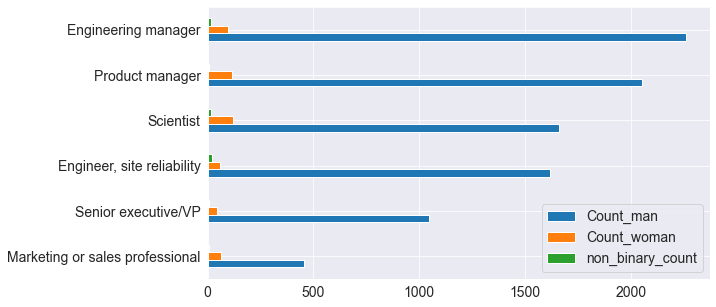

In [70]:
random_6 = d2.iloc[0:6]

random_6.plot(kind='barh')

plt.show()

## which were the most popular pgmming language ?

In [71]:
schema['LanguageWorkedWith']

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

#### Method 1: 

In [74]:
languages = survey_df['LanguageWorkedWith'].to_frame()

In [75]:
lst = []
for idx,row in languages['LanguageWorkedWith'][languages['LanguageWorkedWith'].notna()].iteritems():
    langs = row.split(';')
#     print(idx,langs)
    for lang in langs:
        if lang not in lst:
            lst.append(lang)
            languages[lang] = False
        languages.at[idx,lang] = True 

In [76]:
languages.iloc[:,1:].mean().sort_values(ascending=False)

JavaScript               0.598933
HTML/CSS                 0.558019
SQL                      0.484449
Python                   0.390010
Java                     0.356188
Bash/Shell/PowerShell    0.292399
C#                       0.278030
PHP                      0.231300
TypeScript               0.224614
C++                      0.211147
C                        0.192362
Go                       0.077582
Kotlin                   0.068874
Ruby                     0.062296
Assembly                 0.054474
VBA                      0.053945
Swift                    0.052266
R                        0.050648
Rust                     0.044988
Objective-C              0.036031
Dart                     0.035176
Scala                    0.031506
Perl                     0.027571
Haskell                  0.018614
Julia                    0.007822
dtype: float64

#### Method 2: 

In [98]:
languages = survey_df['LanguageWorkedWith'].str.split(';')
languages

0                               [C#, HTML/CSS, JavaScript]
1                                      [JavaScript, Swift]
2                             [Objective-C, Python, Swift]
3                                                      NaN
4                                    [HTML/CSS, Ruby, SQL]
                               ...                        
64456                                                  NaN
64457    [Assembly, Bash/Shell/PowerShell, C, C#, C++, ...
64458                                                  NaN
64459                                           [HTML/CSS]
64460                [C#, HTML/CSS, Java, JavaScript, SQL]
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [99]:
main_list = []
for vals in languages.values:
    try:
        for val in vals:
            if val not in main_list:
                main_list.append(val)
    except:
        pass
main_list = set(main_list)
c = list(main_list)

In [100]:
languages_worked_df = (survey_df.LanguageWorkedWith).to_frame()
languages_worked_df

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
64456,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,NaN
64459,HTML/CSS


In [101]:
def count_(row,args):
    try:
        if args in row.split(';'):
            return True
    except:
        return False
    
for lang in c:
        languages_worked_df[lang] = languages_worked_df['LanguageWorkedWith'].apply(count_,args=(lang,))

Kotlin
C
Perl
Ruby
Scala
Haskell
Java
C++
Assembly
Bash/Shell/PowerShell
PHP
R
Swift
Objective-C
HTML/CSS
JavaScript
Dart
VBA
Python
SQL
Julia
TypeScript
Go
C#
Rust


In [91]:
languages_worked_mean = languages_worked_df.mean().sort_values(ascending=False)

In [92]:
languages_worked_mean

JAVASCRIPT               0.598933
HTML/CSS                 0.558019
SQL                      0.484449
Python                   0.390010
Java                     0.356188
Bash/Shell/PowerShell    0.292399
C#                       0.278030
PHP                      0.231300
TypeScript               0.224614
C++                      0.211147
C                        0.192362
Go                       0.077582
Kotlin                   0.068874
Ruby                     0.062296
Assembly                 0.054474
VBA                      0.053945
Swift                    0.052266
R                        0.050648
Rust                     0.044988
Objective-C              0.036031
Dart                     0.035176
Scala                    0.031506
Perl                     0.027571
Haskell                  0.018614
Julia                    0.007822
dtype: float64

In [267]:
pgm_lngs = pd.DataFrame({'programming_name':languages_worked_mean.index,'Count':languages_worked_mean.values}).set_index('programming_name')
pgm_lngs.head()

,Count
programming_name,
JAVASCRIPT,0.598933
HTML/CSS,0.558019
SQL,0.484449
Python,0.390010
Java,0.356188


In [268]:
sum = pgm_lngs['Count'].sum()
pgm_lngs['perc'] = pgm_lngs['Count'] / sum * 100

In [269]:
pgm_lngs.sort_values('perc',ascending=False).head()

,Count,perc
programming_name,,
JAVASCRIPT,0.598933,13.491785
HTML/CSS,0.558019,12.570147
SQL,0.484449,10.912881
Python,0.390010,8.785512
Java,0.356188,8.023610


In [270]:
top_8 = pgm_lngs.sort_values('perc',ascending=False).iloc[:9]['perc']

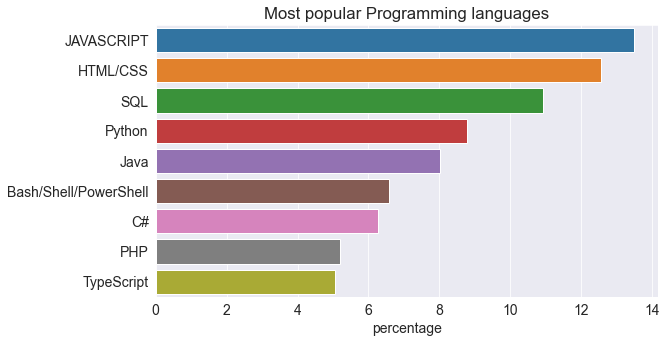

In [271]:
sns.barplot(x=top_8.values, y=top_8.index)


plt.title('Most popular Programming languages')
plt.xlabel('percentage')
plt.ylabel(None)

plt.show()

## Languages Interested :

In [249]:
lang_interested = survey_df['LanguageDesireNextYear'].to_frame()
lang_interested.head()

,LanguageDesireNextYear
0,C#;HTML/CSS;JavaScript
1,Python;Swift
2,Objective-C;Python;Swift
3,NaN
4,Java;Ruby;Scala


In [250]:
# get all the unique languages :
c = []
for row in lang_interested['LanguageDesireNextYear'].dropna():
    for lang in row.split(';'):
        c.append(lang)
        

languages = set(c)
languages = list(languages)

In [251]:
# so that java and JavaScript dont get mixed
lang_interested['LanguageDesireNextYear'] = lang_interested['LanguageDesireNextYear'].str.replace('JavaScript','JAVASCRIPT')

In [252]:
languages.remove('JavaScript')
languages.append('JAVASCRIPT')

In [253]:
def count_(row,args):
    try:
        if args in row.split(';'):
            return True
    except:
        return False
for lang in languages:
    if len(lang) == 1 :
        lang_interested[lang] = lang_interested['LanguageDesireNextYear'].apply(count_,args=(lang,))


In [254]:
top_10 = lang_interested.mean().sort_values(ascending=False).iloc[:11]
top_10

Python                   0.411439
JAVASCRIPT               0.404255
HTML/CSS                 0.320281
SQL                      0.307996
TypeScript               0.264517
C#                       0.210587
Java                     0.204647
Go                       0.194321
Bash/Shell/PowerShell    0.180574
Rust                     0.162706
C++                      0.150142
dtype: float64

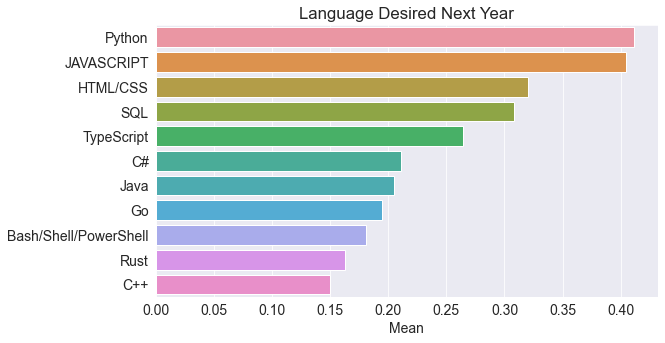

In [255]:
sns.barplot(x= top_10.values, y= top_10.index)

plt.title('Language Desired Next Year')
plt.xlabel('Mean')

plt.show()

### Analyze how many people love their preferred language :

#### ie; they work with it now, and will continue working with it and be intersted them in the future

In [286]:
languages_loved_df = languages_worked_df.iloc[:,1:] & lang_interested.iloc[:,1:]

In [288]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

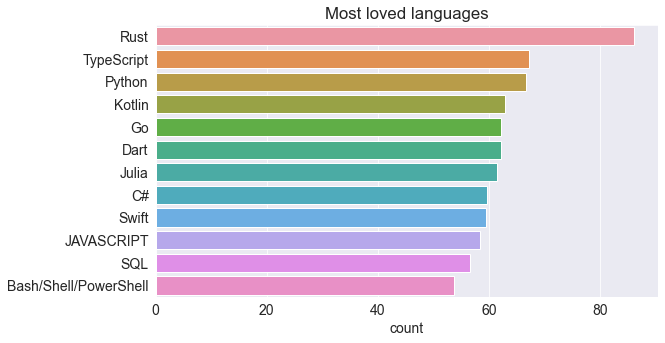

In [298]:
sns.barplot(x=languages_loved_percentages.iloc[:12], y= languages_loved_percentages.iloc[:12].index)

plt.title("Most loved languages");
plt.xlabel('count');

## Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [323]:
survey_df['Country'].value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Antigua and Barbuda        1
Saint Lucia                1
Fiji                       1
Marshall Islands           1
Gabon                      1
Name: Country, Length: 183, dtype: int64

In [331]:
top_countries_mask = (survey_df['Country'].value_counts() > 250)

In [326]:
top_countries = survey_df['Country'].value_counts()[top_countries_mask].index

In [329]:
survey_df = survey_df[survey_df['Country'].isin(top_countries)]

In [333]:
grp = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values(by='WorkWeekHrs',ascending=False)

In [340]:
grp[['WorkWeekHrs']].head(15)

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


In [342]:
countries = pd.read_csv('countries.csv')
countries.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


In [363]:
country_df = countries.set_index(['location']).sort_index()
country_df

,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
location,,,,,
Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
Albania,Europe,2877800.0,78.57,2.89,11803.431
Algeria,Africa,43851043.0,76.88,1.90,13913.839
Andorra,Europe,77265.0,83.73,NaN,NaN
Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...
Vietnam,Asia,97338583.0,75.40,2.60,6171.884
Western Sahara,Africa,597330.0,70.26,NaN,NaN
Yemen,Asia,29825968.0,66.12,0.70,1479.147


In [346]:
grp.head()

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724


In [365]:
country_df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United States Virgin Islands', 'Uruguay', 'Uzbekistan', 'Vatican',
       'Venezuela', 'Vietnam', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='location', length=210)

In [374]:
merged = pd.merge(grp, country_df,left_index=True,right_index=True)[['continent','WorkWeekHrs']]
merged.head()

,continent,WorkWeekHrs
Iran,Asia,44.337748
Israel,Asia,43.915094
China,Asia,42.150000
United States,North America,41.802982
Greece,Europe,41.402724


In [373]:
merged.groupby('continent').mean()

,WorkWeekHrs
continent,
Africa,39.245750
Asia,40.765735
Europe,39.183993
North America,40.454807
Oceania,40.142892
South America,38.455134


### Q: How important is it to start young to build a career in programming?


In [375]:
schema['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

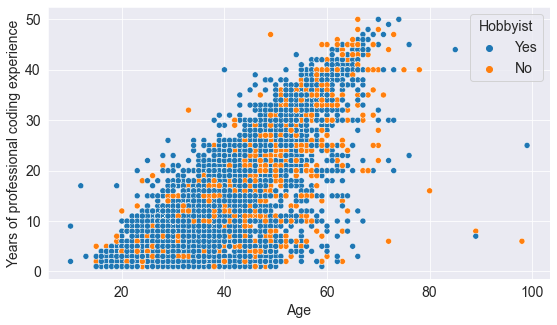

In [380]:
sns.scatterplot(data=survey_df, x='Age', y='YearsCodePro',hue='Hobbyist')
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which seems to indicate that you can **start programming professionally at any age**. Also, many people who have been coding for several decades professionally also seem to enjoy it has a hobby.

We can also view the distribution of `Age1stCode` column to see when the respondents tried programming for the first time.

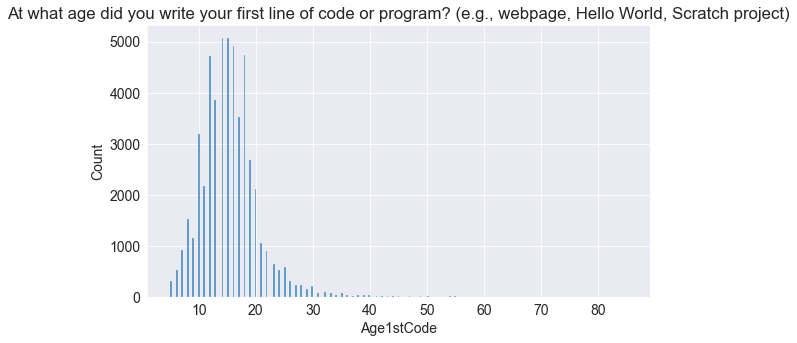

In [387]:
plt.title(schema.Age1stCode)
sns.histplot(survey_df.Age1stCode);